In [1]:
import sys
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("~/Downloads/spilhaus/")

from spilhaus import make_spilhaus_xy_gridpoints, from_spilhaus_xy_to_lonlat, prettify_spilhaus_df

In [2]:
ds = xr.open_dataset('https://www.ncei.noaa.gov/thredds-ocean/dodsC/ncei/woa/temperature/decav/0.25/woa18_decav_t00_04.nc',
                     decode_times=False)
da = ds["t_mn"].sel(depth=0, time=4.326e+03)
da

<xarray.DataArray 't_mn' (lat: 720, lon: 1440)>
[1036800 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
    depth    float32 0.0
    time     float32 4.326e+03
Attributes:
    standard_name:  sea_water_temperature
    long_name:      Average of all unflagged interpolated values at each stan...
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    units:          degrees_celsius
    _ChunkSizes:    [  1  26 180 360]

In [3]:
spilhaus_df = make_spilhaus_xy_gridpoints(spilhaus_res=2000)
lon, lat = from_spilhaus_xy_to_lonlat(spilhaus_df['x'], spilhaus_df['y'])
spilhaus_df['z'] = da.sel(lon=xr.DataArray(lon, dims="points"),
                          lat=xr.DataArray(lat, dims="points"),
                          method="nearest").data

/Users/rlemos/Downloads/spilhaus/spilhaus.py:221: RuntimeWarning: invalid value encountered in sin
  lat_c = arcsin(sin(alpha) * sin(lat_s_rad) + cos(alpha) * cos(lat_s_rad) * cos(lon_s_rad - beta))
/Users/rlemos/Downloads/spilhaus/spilhaus.py:221: RuntimeWarning: invalid value encountered in cos
  lat_c = arcsin(sin(alpha) * sin(lat_s_rad) + cos(alpha) * cos(lat_s_rad) * cos(lon_s_rad - beta))
/Users/rlemos/Downloads/spilhaus/spilhaus.py:225: RuntimeWarning: invalid value encountered in cos
  cos(lat_s_rad) * sin(lon_s_rad - beta),
/Users/rlemos/Downloads/spilhaus/spilhaus.py:225: RuntimeWarning: invalid value encountered in sin
  cos(lat_s_rad) * sin(lon_s_rad - beta),
/Users/rlemos/Downloads/spilhaus/spilhaus.py:226: RuntimeWarning: invalid value encountered in cos
  sin(alpha) * cos(lat_s_rad) * cos(lon_s_rad - beta) - cos(alpha) * sin(lat_s_rad)
/Users/rlemos/Downloads/spilhaus/spilhaus.py:226: RuntimeWarning: invalid value encountered in sin
  sin(alpha) * cos(lat_s_rad) * cos(lo

In [4]:
pretty_spilhaus_df = prettify_spilhaus_df(spilhaus_df)

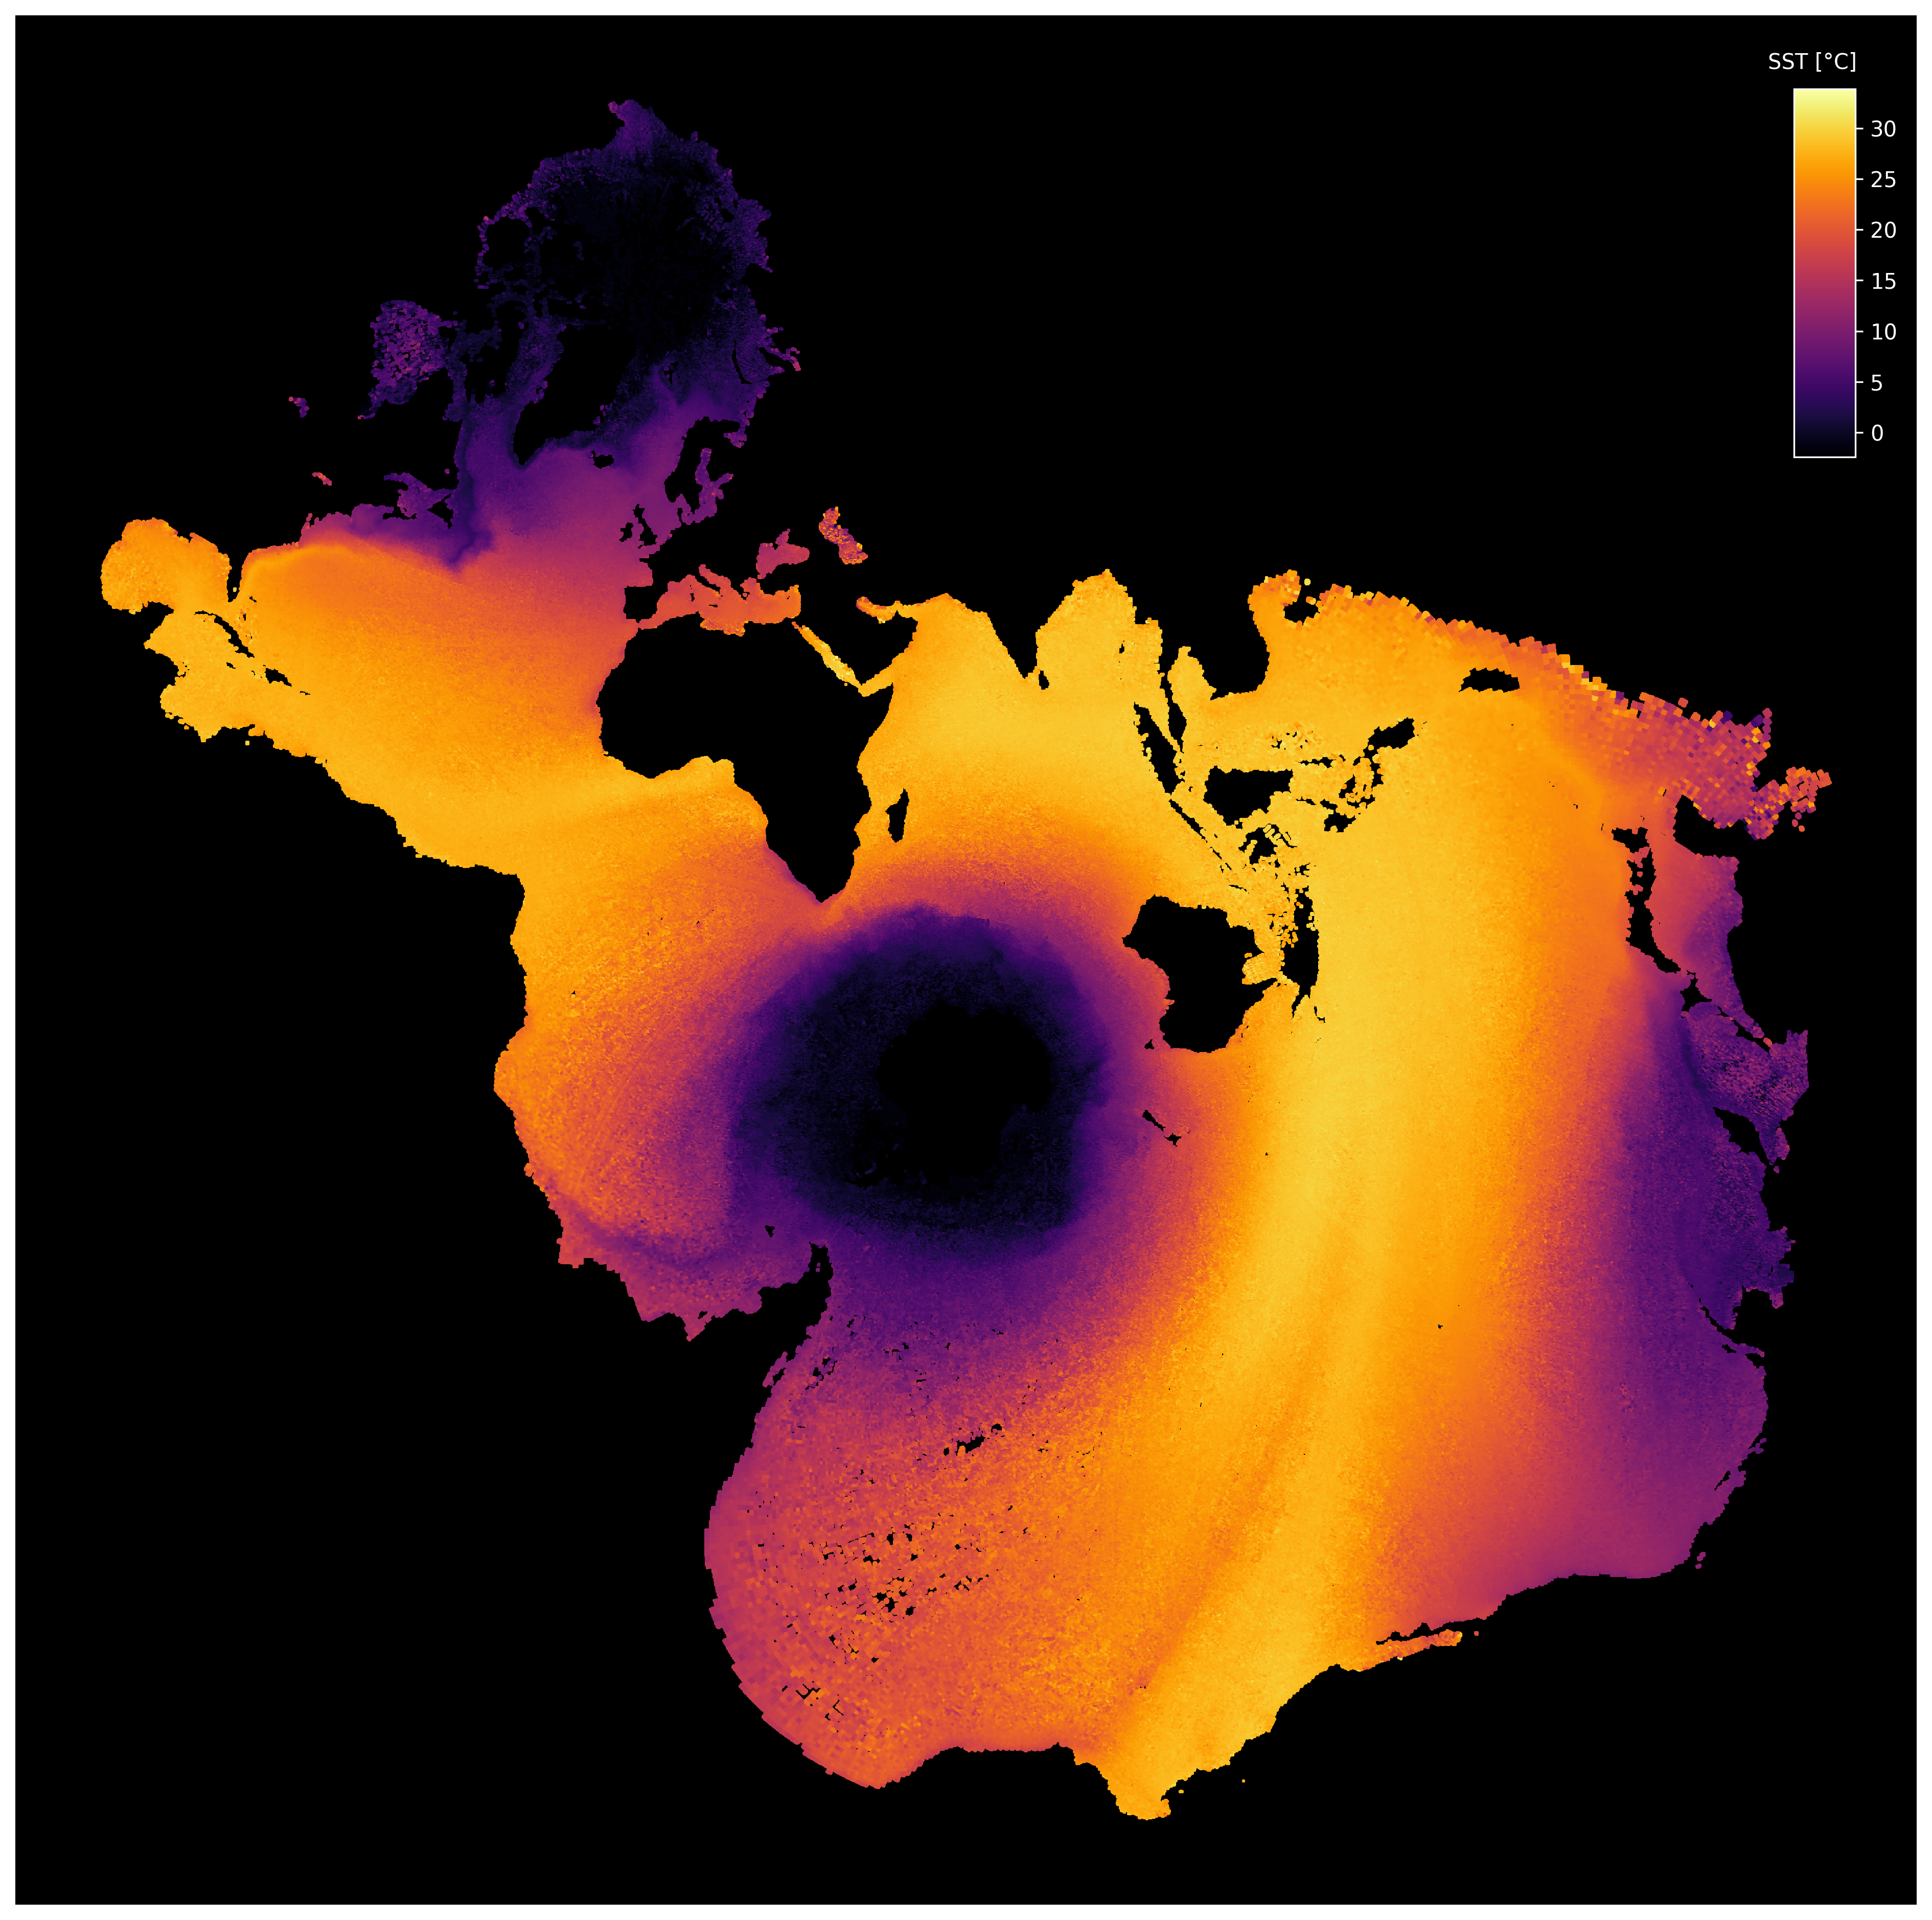

In [5]:
background_color = "black"
foreground_color = "white"
fig, ax = plt.subplots(1, 1, figsize=(16,16), dpi=300)
plt.scatter(x=pretty_spilhaus_df["x"], 
            y=pretty_spilhaus_df["y"], 
            c=pretty_spilhaus_df["z"],
            marker='s', 
            s=72./fig.dpi, 
            cmap="inferno")

cbar_ax = fig.add_axes([0.85, 0.7, 0.025, 0.15])
cbar = plt.colorbar(cax=cbar_ax, ticks=np.linspace(0, 30, 7))
cbar.set_label('SST [°C]', labelpad=-40, y=1.1, rotation=0, color=foreground_color)
cbar.ax.yaxis.set_tick_params(color=foreground_color)
cbar.outline.set_edgecolor(foreground_color)
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color=foreground_color)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

if background_color is not None:
    ax.patch.set_facecolor(background_color)
plt.savefig('./annual_sst_spilhaus.png', transparent=True)
plt.show()